In [1]:
import torch
from torch import nn

# Set random seed
torch.manual_seed(42)

# إنشاء البيانات (يجب أن يكون بعد استيراد torch)
weight = 0.7
bias = 0.3
start = 0    
end = 1 
step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

# تقسيم البيانات
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Define model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

# Initialize model
model_0 = LinearRegressionModel()
print(list(model_0.parameters()))

# Example test prediction
with torch.inference_mode():
    y_preds = model_0(x_test)

# Loss function & optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# Training loop
epochs = 1000  # زيادة عدد epochs لنتائج أفضل
for epoch in range(epochs):
    model_0.train()
    
    # Forward pass
    y_pred = model_0(x_train)
    loss = loss_fn(y_pred, y_train)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:  # طباعة كل 10 epochs
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# التحقق من النتائج النهائية
print(f"\nTrue weight: {weight}, Learned weight: {model_0.weights.item():.4f}")
print(f"True bias: {bias}, Learned bias: {model_0.bias.item():.4f}")

torch.Size([40, 1]) torch.Size([40, 1]) torch.Size([10, 1]) torch.Size([10, 1])
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
Epoch 0: Loss = 0.3129
Epoch 10: Loss = 0.1977
Epoch 20: Loss = 0.0891
Epoch 30: Loss = 0.0531
Epoch 40: Loss = 0.0454
Epoch 50: Loss = 0.0417
Epoch 60: Loss = 0.0382
Epoch 70: Loss = 0.0348
Epoch 80: Loss = 0.0313
Epoch 90: Loss = 0.0279
Epoch 100: Loss = 0.0245
Epoch 110: Loss = 0.0210
Epoch 120: Loss = 0.0176
Epoch 130: Loss = 0.0142
Epoch 140: Loss = 0.0107
Epoch 150: Loss = 0.0073
Epoch 160: Loss = 0.0039
Epoch 170: Loss = 0.0089
Epoch 180: Loss = 0.0089
Epoch 190: Loss = 0.0089
Epoch 200: Loss = 0.0089
Epoch 210: Loss = 0.0089
Epoch 220: Loss = 0.0089
Epoch 230: Loss = 0.0089
Epoch 240: Loss = 0.0089
Epoch 250: Loss = 0.0089
Epoch 260: Loss = 0.0089
Epoch 270: Loss = 0.0089
Epoch 280: Loss = 0.0089
Epoch 290: Loss = 0.0089
Epoch 300: Loss = 0.0089
Epoch 310: Loss = 0.0089
Epoch 320:

In [2]:
with torch.inference_mode():
    y_n=model_0(x_test)

In [3]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [4]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=x_train,train_labels=y_train,test_data=x_test,test_labels=y_test,predections=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",s=4,label="Train data")
    plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")
    if predections is not None:
        plt.scatter(test_data,predections,c="r",s=4,label="Predictions")   
    plt.legend()
    plt.show()

    


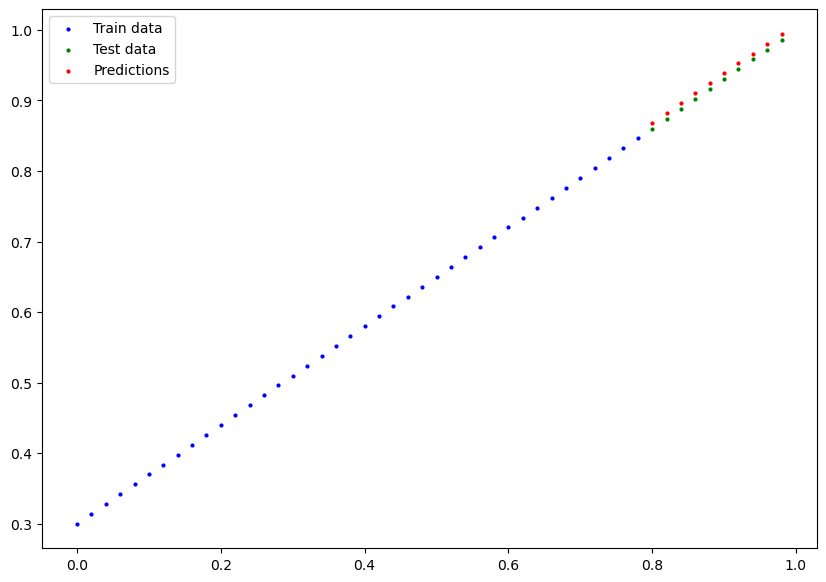

In [5]:
plot_predictions(predections=y_n)

In [6]:
model_0.eval()
with torch.inference_mode():
    test_pred=model_0(x_test)
    test_loss=loss_fn(test_pred,y_test)
    if epoch % 10 == 0:
        print(f"Test loss: {test_loss:.4f}")

In [7]:
from pathlib import Path 
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="01_pytorch_workflow_model_0.pth"
model_save_path=model_path/model_name
print(f"Saving model to: {model_save_path}")
torch.save(obj=model_0.state_dict(),f=model_save_path)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [8]:
loaded_model=LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=model_save_path))
model_0.state_dict()

/tmp/ipykernel_11434/986519629.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=model_save_path))


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [9]:
device="cuda" if torch.cuda.is_available() else "cpu"

weight=0.7
bias=0.3
start=0
end=1
step=0.02
x= torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias
x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [10]:
#split data
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]

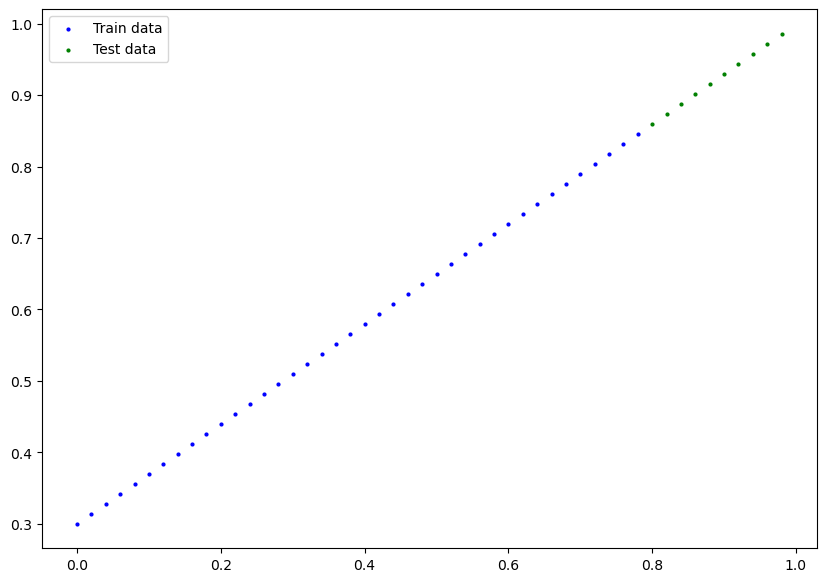

In [11]:
plot_predictions(x_train,y_train,x_test,y_test)

In [12]:
class LinearRegressionModelv2(nn.Module):
    def __init__ (self):
        super().__init__()
        self.liner_layer=nn.Linear(in_features=1,out_features=1)
        def forward(self,x: torch.Tensor)->torch.Tensor:
            return self.linear_layer(x)
torch.manual_seed(42)
model_1=LinearRegressionModelv2()
model_1.state_dict()


OrderedDict([('liner_layer.weight', tensor([[0.7645]])),
             ('liner_layer.bias', tensor([0.8300]))])

In [13]:
next(model_1.parameters())

Parameter containing:
tensor([[0.7645]], requires_grad=True)

In [14]:
model_1.to(device)

LinearRegressionModelv2(
  (liner_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [15]:
weight=0.7
bias=0.3
start=0
end=1
step=0.002
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]
class LinearRegressionModelv3(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer=nn.Linear(in_features=1,out_features=1)
    def forward(self,x:torch.Tensor)->torch.Tensor:
            return self.linear_layer(x)
model_02=LinearRegressionModelv3()
torch.manual_seed(42)
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_02.parameters(),lr=0.01 )
epochs=100
for epoch in range(epochs):
    model_02.train()
    y_pred=model_02(x_train)
    loss=loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
model_02.eval()
with torch.inference_mode():
    test_pred=model_02(x_test)
    test_loss=loss_fn(test_pred,y_test)

if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss}")   
print(f"\nTrue weight: {weight}, Learned weight: {model_02.linear_layer.weight.item():.4f}")
print(f"True bias: {bias}, Learned bias: {model_02.linear_layer.bias.item():.4f}")  
model_02.state_dict()



True weight: 0.7, Learned weight: -0.1496
True bias: 0.3, Learned bias: 0.6715


OrderedDict([('linear_layer.weight', tensor([[-0.1496]])),
             ('linear_layer.bias', tensor([0.6715]))])

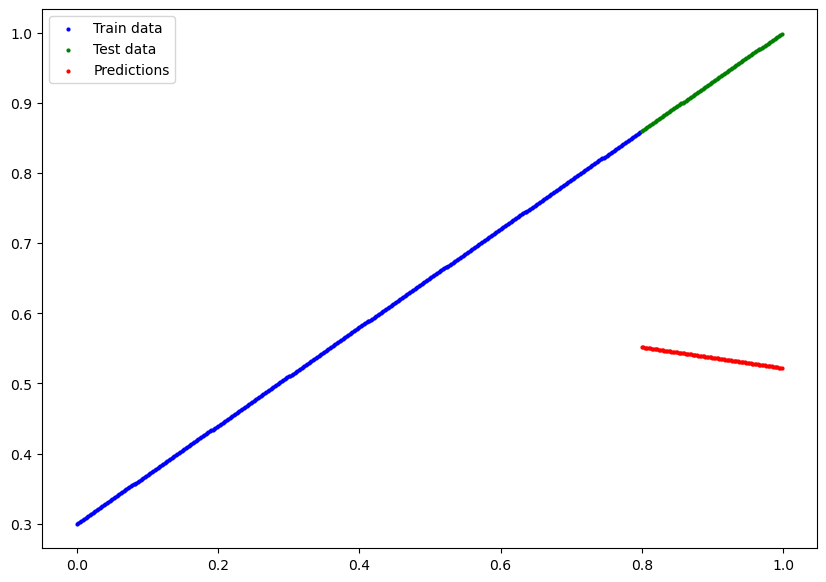

In [16]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=x_train,train_labels=y_train,test_data=x_test,test_labels=y_test,predections=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",s=4,label="Train data")
    plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")
    if predections is not None:
        plt.scatter(test_data,predections,c="r",s=4,label="Predictions")   
    plt.legend()
    plt.show()

plot_predictions(predections=test_pred.detach().cpu().numpy())



In [17]:
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="01_pytorch_workflow_model_02.pth" 
model_save_path=model_path/model_name
print(f"Saving model to: {model_save_path}")  
torch.save(obj=model_02.state_dict(),f=model_save_path)

Saving model to: models/01_pytorch_workflow_model_02.pth


In [18]:
loaded_model=LinearRegressionModelv3()
loaded_model.load_state_dict(torch.load(f=model_save_path))
loaded_model.state_dict()

/tmp/ipykernel_11434/2855204346.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=model_save_path))


OrderedDict([('linear_layer.weight', tensor([[-0.1496]])),
             ('linear_layer.bias', tensor([0.6715]))])

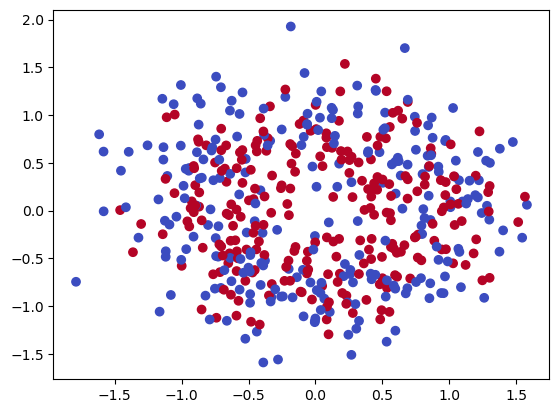

In [19]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=500, noise=0.3, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.show()


In [20]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 10000
X, y =make_circles(n_samples,noise=0.03,random_state=42)



In [21]:
len(X),len(y)
print(f"first 5 samples of X : {X[:5]  } first samples of y : {y[:5]}")

first 5 samples of X : [[ 0.0464692   0.82477834]
 [ 1.00506323 -0.43335153]
 [-0.58348442  0.79452834]
 [ 0.98478298 -0.32517879]
 [ 0.82993028 -0.54722305]] first samples of y : [1 0 0 0 0]


In [22]:
import pandas as pd 
circles = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y})
circles.head(10)

,X1,X2,label
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0
5,-0.133929,0.776249,1
6,0.779197,0.645811,0
7,0.722955,0.173831,1
8,-0.121807,0.796951,1
9,0.849529,0.505678,0


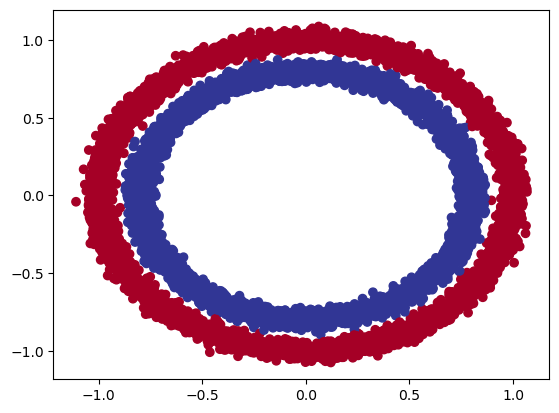

In [23]:
import matplotlib.pyplot as plt 
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [24]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
len(X),len(y)
print(f"first 5 samples of X : {X[:5]  } first samples of y : {y[:5]}")

first 5 samples of X : tensor([[ 0.0465,  0.8248],
        [ 1.0051, -0.4334],
        [-0.5835,  0.7945],
        [ 0.9848, -0.3252],
        [ 0.8299, -0.5472]]) first samples of y : tensor([1., 0., 0., 0., 0.])


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
import torch 
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device
X_train

tensor([[ 0.2029, -1.0081],
        [-0.1717, -0.9750],
        [ 0.5565,  0.5440],
        ...,
        [-0.0074,  0.7569],
        [ 0.4034, -0.6994],
        [-0.9532,  0.2216]])

In [27]:
class circles (nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_01=nn.Linear(in_features=2,out_features=5)
        self.layer_02=nn.Linear(in_features=5,out_features=1)
    def forward(self,x):
        return self.layer_02(self.layer_01(X))
model_circles=circles().to(device)
        

In [28]:
model_03=nn.Sequential(
    nn.Linear(in_features=2,out_features=125),
    nn.Linear(in_features=125,out_features=125),
    nn.ReLU(),
    nn.Linear(in_features=125,out_features=125),
    nn.Linear(in_features=125,out_features=125),
    nn.ReLU(),
    nn.Linear(in_features=125,out_features=125),
    nn.Linear(in_features=125,out_features=1)     
    
)
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_03.parameters(),lr=0.1)  

In [29]:
!nvidia-smi

Fri Oct 17 21:15:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.95.05              Driver Version: 580.95.05      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   57C    P4             13W /   25W |     107MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [30]:
#setup the loss function 
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_03.parameters(),lr=0.001)
#calculate accuracy 
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=correct/len(y_pred)*100
    return acc
accuracy_fn(y_true=torch.tensor([1,0,1,1,0]),y_pred=torch.tensor([1,0,0,1,1]))
model_03.eval()
with torch.inference_mode():
    y_logits=model_03(X_test)[:5]
#y_logits
#use the sigmoid function to convert our model logits into prediction probabilities
y_pred_probs=torch.sigmoid(y_logits)
#print(f'this is y_pred {y_pred_probs}')
#find the predicted labels
y_preds=torch.round(y_pred_probs)
#print(f'this is y_preds {y_preds}')
#in full (logits -> pred probs -> preds labels)
y_pred_labels=torch.round(torch.sigmoid(model_03(X_test)))[:5]
#print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))
#get rid of extra dimension 
y_preds.squeeze()
#build a training loop for model_03
torch.manual_seed(42)
epochs=1000
for epoch in range (epochs):
    model_03.train()
    y_logits=model_03(X_train).squeeze()
    y_pred=torch.round (torch.sigmoid(y_logits))
    #calculate the loss and accuracy
    loss=loss_fn(y_logits,y_train)
    acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
    #optimizer
    optimizer.zero_grad()
    #backward pass
    loss.backward()
    optimizer.step()
#testing
    model_03.eval()
    with torch.inference_mode():
     test_logits=model_03(X_test).squeeze()
     test_pred=torch.round(torch.sigmoid(test_logits))
    #calculate loss and accuracy
     test_loss=loss_fn(test_logits,y_test)
     test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")
 


Epoch: 0 | Loss: 0.69420, Acc: 49.84% | Test Loss: 0.6935, Test Acc: 50.65%
Epoch: 10 | Loss: 0.69418, Acc: 49.84% | Test Loss: 0.6935, Test Acc: 50.65%
Epoch: 20 | Loss: 0.69417, Acc: 49.84% | Test Loss: 0.6935, Test Acc: 50.65%
Epoch: 30 | Loss: 0.69415, Acc: 49.84% | Test Loss: 0.6934, Test Acc: 50.65%
Epoch: 40 | Loss: 0.69413, Acc: 49.84% | Test Loss: 0.6934, Test Acc: 50.65%
Epoch: 50 | Loss: 0.69412, Acc: 49.84% | Test Loss: 0.6934, Test Acc: 50.65%
Epoch: 60 | Loss: 0.69410, Acc: 49.84% | Test Loss: 0.6934, Test Acc: 50.65%
Epoch: 70 | Loss: 0.69409, Acc: 49.84% | Test Loss: 0.6934, Test Acc: 50.65%
Epoch: 80 | Loss: 0.69407, Acc: 49.84% | Test Loss: 0.6934, Test Acc: 50.65%
Epoch: 90 | Loss: 0.69405, Acc: 49.84% | Test Loss: 0.6934, Test Acc: 50.65%
Epoch: 100 | Loss: 0.69404, Acc: 49.84% | Test Loss: 0.6934, Test Acc: 50.65%
Epoch: 110 | Loss: 0.69402, Acc: 49.84% | Test Loss: 0.6933, Test Acc: 50.65%
Epoch: 120 | Loss: 0.69401, Acc: 49.84% | Test Loss: 0.6933, Test Acc: 50.6

In [31]:
import requests 
from pathlib import Path 
if Path ("helper_function.py").is_file():
    print("helper_function.py already exists")
else:
    print("downloading helper_function.py")
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)


downloading helper_function.py


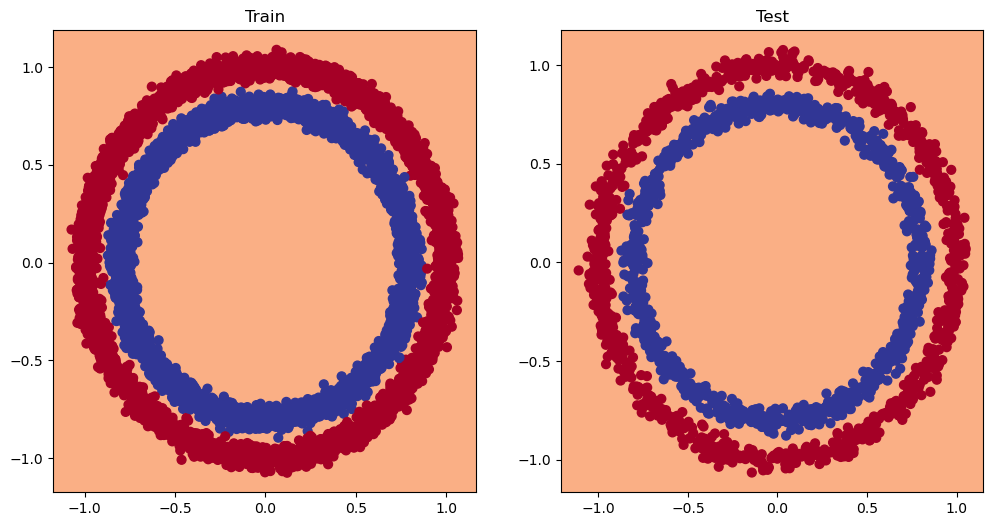

In [32]:
from helper_functions import plot_predictions, plot_decision_boundary, accuracy_fn
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_03,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_03,X_test,y_test)

In [33]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
    def forward(self,x):
        return self.layer_3(self.layer_2(self.layer_1(x)))
model_04=CircleModelV2().to(device)
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_04.parameters(),lr=0.1)
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
epochs=1000
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)
for epoch in range (epochs):
    model_04.train()
    y_logits=model_04(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))
    loss=loss_fn(y_logits,y_train)
    acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_04.eval()
    with torch.inference_mode():
        test_logits=model_04(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))
        test_loss=loss_fn(test_logits,y_test)
        test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69361, Acc: 50.88% | Test Loss: 0.6941, Test Acc: 50.50%
Epoch: 10 | Loss: 0.69347, Acc: 50.60% | Test Loss: 0.6939, Test Acc: 49.85%
Epoch: 20 | Loss: 0.69338, Acc: 50.55% | Test Loss: 0.6937, Test Acc: 49.70%
Epoch: 30 | Loss: 0.69332, Acc: 50.54% | Test Loss: 0.6936, Test Acc: 49.85%
Epoch: 40 | Loss: 0.69327, Acc: 50.48% | Test Loss: 0.6935, Test Acc: 49.75%
Epoch: 50 | Loss: 0.69323, Acc: 50.52% | Test Loss: 0.6935, Test Acc: 50.25%
Epoch: 60 | Loss: 0.69321, Acc: 50.45% | Test Loss: 0.6934, Test Acc: 50.40%
Epoch: 70 | Loss: 0.69319, Acc: 50.56% | Test Loss: 0.6934, Test Acc: 50.45%
Epoch: 80 | Loss: 0.69317, Acc: 50.68% | Test Loss: 0.6934, Test Acc: 50.50%
Epoch: 90 | Loss: 0.69316, Acc: 50.85% | Test Loss: 0.6934, Test Acc: 50.70%
Epoch: 100 | Loss: 0.69315, Acc: 51.06% | Test Loss: 0.6934, Test Acc: 50.50%
Epoch: 110 | Loss: 0.69315, Acc: 51.06% | Test Loss: 0.6933, Test Acc: 50.00%
Epoch: 120 | Loss: 0.69314, Acc: 51.28% | Test Loss: 0.6933, Test Acc: 49.9

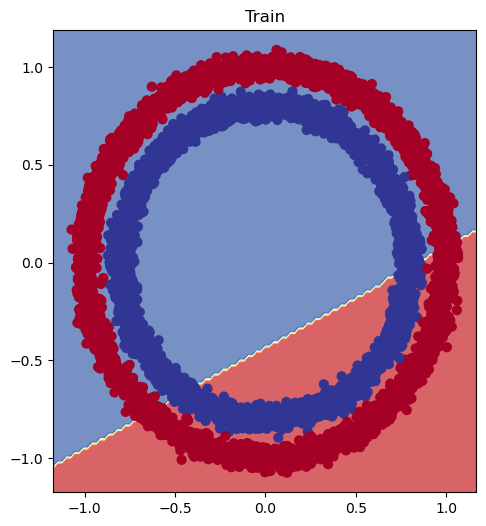

In [35]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_04,X_train.cpu(),y_train.cpu())        